# Q-learning 
> 这个例子将实现一个简单的Q-learning算法来解决一个小型的网格世界导航问题。
### 问题描述
我们将创建一个简单的网格世界环境，其中一个智能体需要学习如何从起点导航到目标点。
#### 环境描述：
1. 环境是一个 n x n 的网格世界（例如 5x5）。
2. 网格中有一个起点（例如左上角）和一个目标点（例如右下角）。
3. 网格中可能存在一些障碍物，智能体不能穿过这些障碍物。
#### 智能体的动作：
智能体在每个时间步可以采取四个动作之一：上、下、左、右。
#### 奖励设置：
1. 到达目标点：获得大的正奖励（例如 +1）
2. 撞到障碍物或尝试离开网格：获得负奖励（例如 -1）
3. 每一步移动：小的负奖励（例如 -0.01），以鼓励智能体寻找最短路径
#### 目标：
智能体的目标是学习一个最优策略，使其能够从起点以最少的步数到达目标点，同时避开障碍物。
#### 学习算法：
我们可以使用Q-learning算法来解决这个问题。Q-learning是一种无模型的强化学习算法，它通过学习动作-价值函数（Q函数）来找到最优策略。

### 0. 导入必要的库

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### 1. 定义网格世界和Q-learning的参数

In [17]:
def create_maze(size):
    maze = np.zeros((size, size))
    maze[0,0] = 2
    maze[size-1, size-1] = 3

    obstacles = [(1,1),(2,1),(3,3),(1,3)]
    for obs in obstacles:
        maze[obs] = 1

    return maze

def plot_maze(maze):
    cmap = ListedColormap(['white', 'black', 'green', 'red'])
    plt.figure(figsize=(8,8))
    plt.imshow(maze, cmap=cmap)
    plt.title('Maze Configuration')
    plt.colorbar(ticks=[0,1,2,3], label='0: Path, 1: Obstacle, 2: Start, 3: Goal')
    plt.show()

In [14]:
# 定义网格世界的大小
grid_size = 5

# 定义动作空间
actions = ['up', 'right', 'down', 'left']

# 初始化Q表
Q = np.zeros((grid_size, grid_size, len(actions)))

# 定义学习参数
alpha = 0.1  # 学习率
gamma = 0.9  # 折扣因子
epsilon = 0.1  # 探索率

# 定义奖励
goal_state = (grid_size-1, grid_size-1)
goal_reward = 1
step_reward = -0.01

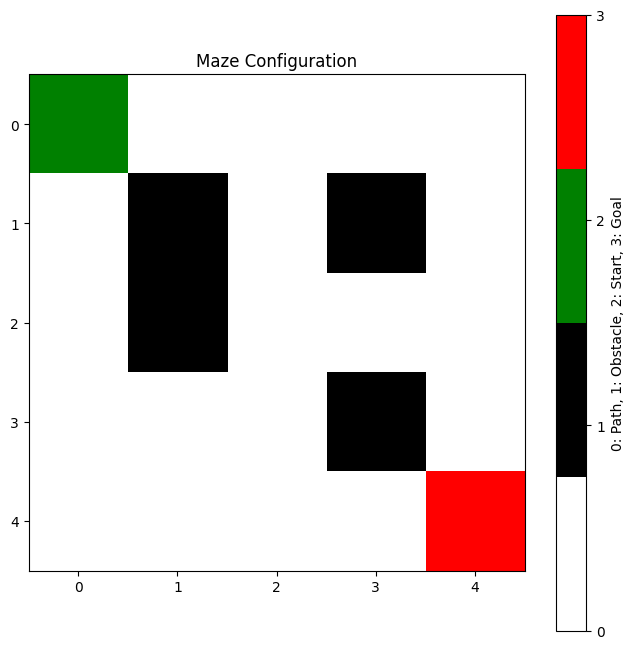

In [18]:
maze = create_maze(grid_size)
plot_maze(maze)

### 2. 定义辅助函数
#### 状态转移函数实现方法：
1. 参数：
- `state`：一个元组，表示智能体当前的位置（x, y）。
- `action`：一个字符串，表示智能体想要移动的方向（'up'、'right'、'down'、'left'）。
2. 功能：
函数根据智能体的当前状态和所选择的动作来计算新的位置。
使用 `max` 和 `min` 函数来确保智能体不会移动出网格的边界。例如：
如果智能体在最上面一行，尝试向上移动时，它的y坐标不会小于0，保持在最上面一行。
如果智能体在最右边一列，尝试向右移动时，它的x坐标不会超过网格的最大值（`grid_size-1`）。

#### 贪心算法具体解释：
1. 参数：
- `state`：当前状态，表示智能体在网格中的位置。
- `epsilon`：一个介于0和1之间的值，表示探索的概率。
2. 功能：
该函数通过随机数生成来决定智能体的动作：
- 探索（Exploration）：如果生成的随机数小于epsilon，智能体会随机选择一个动作。这种方式允许智能体尝试新的动作，以发现可能更好的策略。
- 利用（Exploitation）：如果生成的随机数大于或等于epsilon，智能体会选择当前状态下Q值最大的动作，即选择它认为最优的动作。这种方式利用了智能体已经学到的知识。

**总结：**
这段代码通过结合探索和利用的策略，使得智能体在学习过程中既能尝试新的动作（探索），又能利用已有的知识（利用），从而更有效地学习到最优策略。

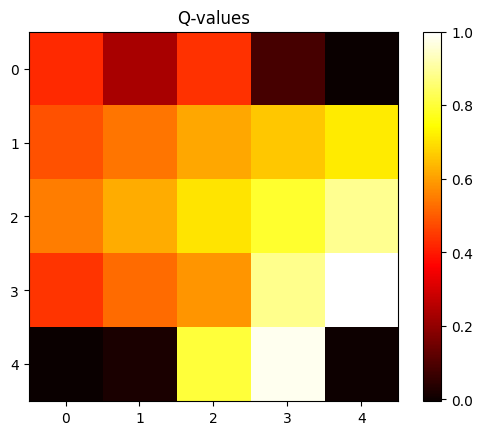

Optimal path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


In [19]:
# 定义获取下一个状态的函数
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(x-1, 0), y)
    elif action == 'right':
        return (x, min(y+1, grid_size-1))
    elif action == 'down':
        return (min(x+1, grid_size-1), y)
    elif action == 'left':
        return (x, max(y-1, 0))

# 定义ε-贪心策略
def epsilon_greedy(state, epsilon):
    if np.random.random() < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(Q[state])]


# 训练函数
def train(episodes):
    for _ in range(episodes):
        state = (0, 0)  # 起始状态
        while state != goal_state:
            action = epsilon_greedy(state, epsilon)
            next_state = get_next_state(state, action)
            reward = goal_reward if next_state == goal_state else step_reward
            
            # Q-learning更新公式
            Q[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][actions.index(action)])
            
            state = next_state

# 训练模型
train(1000)

# 可视化Q表
plt.imshow(np.max(Q, axis=2), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Q-values')
plt.show()

# 展示最优路径
def show_optimal_path():
    state = (0, 0)
    path = [state]
    while state != goal_state:
        action = actions[np.argmax(Q[state])]
        state = get_next_state(state, action)
        path.append(state)
    return path

optimal_path = show_optimal_path()
print("Optimal path:", optimal_path)

### 3. 定义Q-learning的训练函数
Q值（Q-value）是Q-learning算法中的一个核心概念，它表示在给定状态下采取某个特定动作的预期收益。Q值的更新和计算是通过智能体在环境中与环境交互的过程来实现的。以下是Q值的来源和计算过程的简要说明：
Q值的来源：
1. 初始化：
在开始时，Q表（Q-table）通常被初始化为零或小的随机值。Q表的维度是状态空间和动作空间的组合，表示每个状态-动作对的Q值。
2. 与环境的交互：
智能体在环境中进行训练时，它会从起始状态开始，选择一个动作（根据ε-贪心策略），然后执行该动作，观察到下一个状态和获得的奖励。
3. Q值更新：
Q值的更新是通过以下公式实现的：

$Q(s,a)←Q(s,a)+α(r+γmax_a Q(s',a')-Q(s,a))$ 
其中，
- $Q(s,a)$ 是状态 $s$ 下采取动作 $a$ 的Q值。
- $α$ 是学习率，决定了新信息覆盖旧信息的程度。
- $r$ 是智能体在状态 $s$ 下采取动作 $a$ 后获得的奖励。
- $γ$ 是折扣因子，决定了未来奖励的重要性。
- $max_a Q(s',a')$ 是在下一个状态 $s'$ 下所有可能动作的Q值的最大值。

4. 迭代学习：
通过多次训练（多个回合），智能体不断更新Q值，逐渐学习到在不同状态下采取不同动作的预期收益，从而形成一个完整的Q表。
总结：
Q值是通过智能体与环境的交互过程不断更新和学习得来的，反映了在特定状态下采取某个动作的长期预期收益。随着训练的进行，Q值会逐渐收敛到真实的价值，帮助智能体做出更优的决策。Q值（Q-value）是Q-learning算法中的一个核心概念，它表示在给定状态下采取某个特定动作的预期收益。Q值的更新和计算是通过智能体在环境中与环境交互的过程来实现的。以下是Q值的来源和计算过程的简要说明：
Q值的来源：
1. 初始化：
在开始时，Q表（Q-table）通常被初始化为零或小的随机值。Q表的维度是状态空间和动作空间的组合，表示每个状态-动作对的Q值。
2. 与环境的交互：
智能体在环境中进行训练时，它会从起始状态开始，选择一个动作（根据ε-贪心策略），然后执行该动作，观察到下一个状态和获得的奖励。
3. Q值更新：
Q值的更新是通过以下公式实现的：
4. 迭代学习：
通过多次训练（多个回合），智能体不断更新Q值，逐渐学习到在不同状态下采取不同动作的预期收益，从而形成一个完整的Q表。
总结：
Q值是通过智能体与环境的交互过程不断更新和学习得来的，反映了在特定状态下采取某个动作的长期预期收益。随着训练的进行，Q值会逐渐收敛到真实的价值，帮助智能体做出更优的决策。Q值（Q-value）是Q-learning算法中的一个核心概念，它表示在给定状态下采取某个特定动作的预期收益。Q值的更新和计算是通过智能体在环境中与环境交互的过程来实现的。以下是Q值的来源和计算过程的简要说明：
Q值的来源：
1. 初始化：
在开始时，Q表（Q-table）通常被初始化为零或小的随机值。Q表的维度是状态空间和动作空间的组合，表示每个状态-动作对的Q值。
2. 与环境的交互：
智能体在环境中进行训练时，它会从起始状态开始，选择一个动作（根据ε-贪心策略），然后执行该动作，观察到下一个状态和获得的奖励。
3. Q值更新：
Q值的更新是通过以下公式实现的：
$Q(s,a)←Q(s,a)+α(r+γmax_a Q(s',a'))$ 
4. 迭代学习：
通过多次训练（多个回合），智能体不断更新Q值，逐渐学习到在不同状态下采取不同动作的预期收益，从而形成一个完整的Q表。
总结：
Q值是通过智能体与环境的交互过程不断更新和学习得来的，反映了在特定状态下采取某个动作的长期预期收益。随着训练的进行，Q值会逐渐收敛到真实的价值，帮助智能体做出更优的决策。Q值（Q-value）是Q-learning算法中的一个核心概念，它表示在给定状态下采取某个特定动作的预期收益。Q值的更新和计算是通过智能体在环境中与环境交互的过程来实现的。以下是Q值的来源和计算过程的简要说明：
Q值的来源：
1. 初始化：
在开始时，Q表（Q-table）通常被初始化为零或小的随机值。Q表的维度是状态空间和动作空间的组合，表示每个状态-动作对的Q值。
2. 与环境的交互：
智能体在环境中进行训练时，它会从起始状态开始，选择一个动作（根据ε-贪心策略），然后执行该动作，观察到下一个状态和获得的奖励。
3. Q值更新：
Q值的更新是通过以下公式实现的：
$Q(s,a)←Q(s,a)+α(r+γmax_a Q(s',a')$ 
4. 迭代学习：
通过多次训练（多个回合），智能体不断更新Q值，逐渐学习到在不同状态下采取不同动作的预期收益，从而形成一个完整的Q表。
总结：
Q值是通过智能体与环境的交互过程不断更新和学习得来的，反映了在特定状态下采取某个动作的长期预期收益。随着训练的进行，Q值会逐渐收敛到真实的价值，帮助智能体做出更优的决策。

In [6]:
# 训练函数
def train(episodes):
    for _ in range(episodes):
        state = (0, 0)  # 起始状态
        while state != goal_state:
            action = epsilon_greedy(state, epsilon)
            next_state = get_next_state(state, action)
            reward = goal_reward if next_state == goal_state else step_reward
            
            # Q-learning更新公式
            Q[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][actions.index(action)])
            
            state = next_state

# 训练模型
train(1000)